### Você se sente mais capaz de conduzir pesquisas com conteúdos de Engenharia de Software Experimental após a disciplina?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, wilcoxon

In [2]:
df = pd.read_csv("../csv/feedback-v2.csv")
df.columns = df.columns.str.strip()

In [3]:
df['Você se sente mais capaz de conduzir pesquisas com conteúdos de Engenharia de Software Experimental após a disciplina?']

scale = {
    "Concordo Totalmente": 4,
    "Concordo": 3,
    "Nem concordo, nem discordo": 2,
    "Discordo": 1,
    "Discordo Totalmente": 0
}

df['Capacidade de Conducao'] = df['Você se sente mais capaz de conduzir pesquisas com conteúdos de Engenharia de Software Experimental após a disciplina?'] \
    .map(scale)

In [4]:
all_levels = [0, 1, 2, 3, 4]

colors = {
    4: "#1f77b4",  # Azul
    3: "#992bfb",  # roxo
    2: "#2ca02c",  # Verde
    1: "#ffcf1e",  # amarelo
    0: "#d62728"   # Vermelho
}

labels = {
    4: "Totally Agree",
    3: "Agree",
    2: "Neither agree nor disagree",
    1: "Disagree",
    0: "Totally Disagree"
}

In [5]:
counts = (
    df["Capacidade de Conducao"]
    .value_counts()
    .reindex(all_levels, fill_value=0)
)

percent = (counts / counts.sum() * 100).round(1)

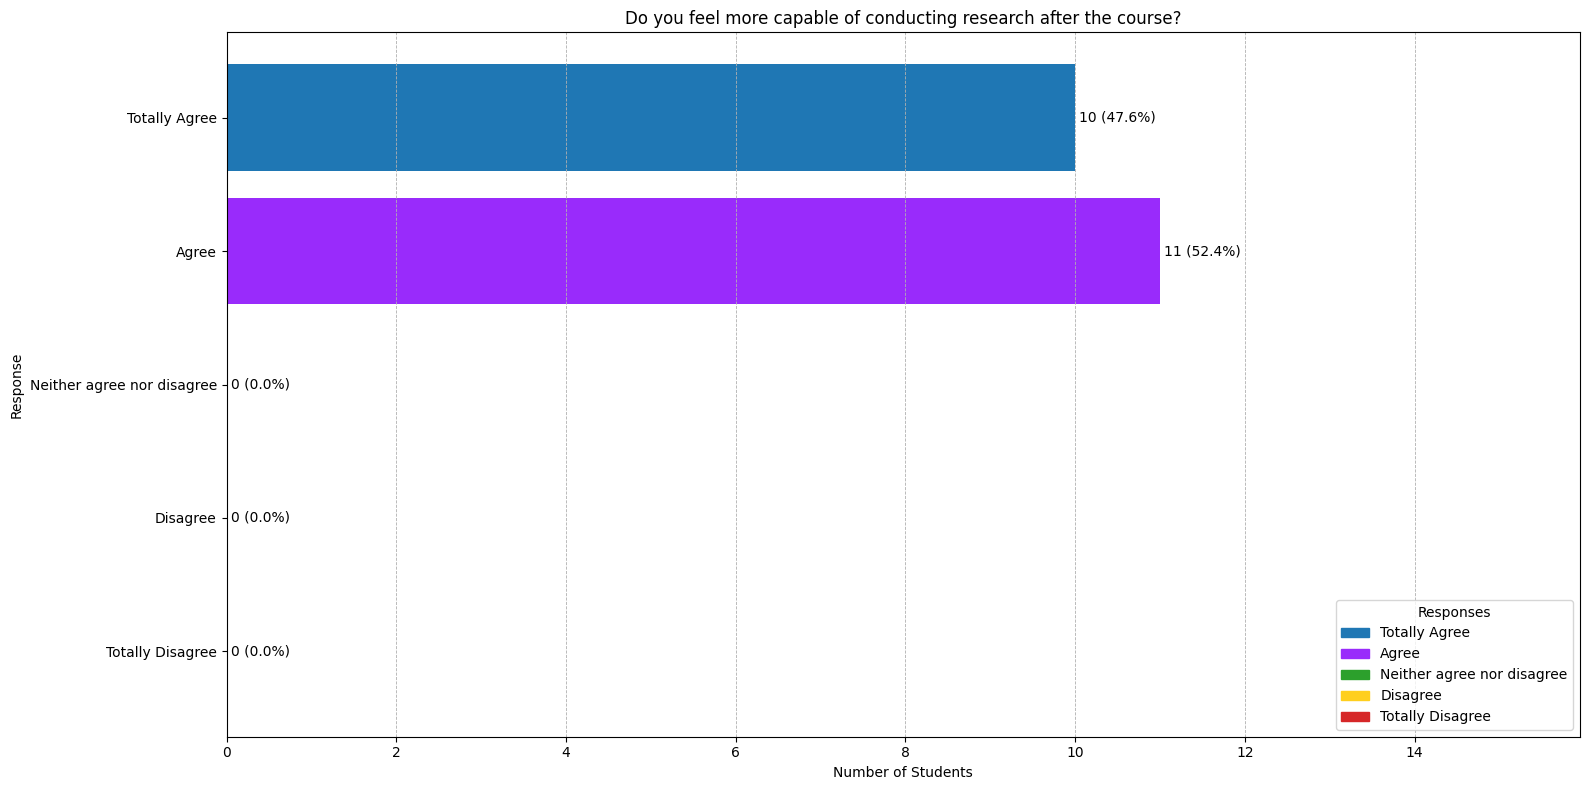

In [6]:
plt.figure(figsize=(16, 8))  

plt.xlim(0, counts.max() + counts.max() * 0.45)  

plt.barh(
    [labels[i] for i in all_levels],
    counts.values,
    color=[colors[i] for i in all_levels]
)

max_val = counts.max()
offset = max_val * 0.05 if max_val > 0 else 0.3

for i, (c, p) in enumerate(zip(counts.values, percent.values)):
    plt.text(c + 0.05, i, f"{c} ({p}%)", va="center")

plt.xlabel("Number of Students")
plt.ylabel("Response")
plt.title("Do you feel more capable of conducting research after the course?")
plt.grid(axis='x', linestyle='--', linewidth=0.6)

legend_labels = ["Totally Agree", "Agree", "Neither agree nor disagree", "Disagree", "Totally Disagree"]
legend_colors = ["#1f77b4", "#992bfb", "#2ca02c", "#ffcf1e", "#d62728"]
patches = [plt.Rectangle((0,0),1,1, color=c) for c in legend_colors]

plt.legend(
    patches,
    legend_labels,
    title="Responses",
    loc="lower right",
)

plt.tight_layout()
plt.show()